In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file0 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_uds.root")
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_uu.root")
# file2 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_dd.root")
# file3 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_ss.root")

file0 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_uds.400.maxp0.root")
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_uu.400.maxp0.root")
file2 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_dd.400.maxp0.root")
file3 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_ss.400.maxp0.root")


In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
#     p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.GetEntries())

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file0.GetKeyNames()
print(keyList)

['h_mc_stable_nKaons_evt', 'h_mc_stable_Kaon_cos', 'h_mc_quark_cos', 'h_mc_quark_sep', 'h_mc_quark_m', 'h_mc_quark_pp', 'h_mc_quark_pz', 'h_mc_quark_E', 'h_mc_quark_p', 'h_mc_stable_isr_p', 'h_pfo_Kaon_cos', 'h_pfo_LeadKaons_abscos', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadKaons_cosAdd', 'h_pfo_LeadK_phiDiff', 'h_pfo_k_mult_jet', 'h_pfo_jet_angdiff', 'h_pfo_jet_mult', 'h_pfo_jet_mult_uu', 'h_pfo_jet_mult_dd', 'h_pfo_jet_mult_ss', 'h_pfo_jet_LeadK_cos', 'h_pfo_jet_charge', 'h_pfo_jet_charge_u', 'h_pfo_jet_charge_ubar', 'h_pfo_jet_charge_d', 'h_pfo_jet_charge_dbar', 'h_pfo_jet_charge_s', 'h_pfo_jet_charge_sbar', 'h_pfo_q_match_charge', 'h_pfo_qbar_match_charge', 'h_pfo_LeadK_q_match_charge', 'h_pfo_LeadK_qbar_match_charge', 'h_pfo_LeadK_p', 'h_pfo_LeadK_p_10']


In [6]:
h_mc_quark_cos_uds = file0.Get("h_mc_quark_cos")
h_pfo_LeadKaons_cos_uds = file0.Get("h_pfo_LeadKaons_cos")

h_mc_quark_cos_uu = file1.Get("h_mc_quark_cos")
h_pfo_LeadKaons_cos_uu = file1.Get("h_pfo_LeadKaons_cos")

h_mc_quark_cos_dd = file2.Get("h_mc_quark_cos")
h_pfo_LeadKaons_cos_dd = file2.Get("h_pfo_LeadKaons_cos")

h_mc_quark_cos_ss = file3.Get("h_mc_quark_cos")
h_pfo_LeadKaons_cos_ss = file3.Get("h_pfo_LeadKaons_cos")


makePretty(h_mc_quark_cos_uds,kBlack)
makePretty(h_pfo_LeadKaons_cos_uds,kBlack)
h_pfo_LeadKaons_cos_uds.SetMarkerStyle(8)
h_pfo_LeadKaons_cos_uds.SetMarkerSize(0.8)

makePretty(h_mc_quark_cos_uu,kBlue)
makePretty(h_mc_quark_cos_dd,kGreen)
makePretty(h_mc_quark_cos_ss,kRed)


In [7]:
nbinsX = h_mc_quark_cos_dd.GetNbinsX()
h_mc_quark_cos_dd_flip = TH1F("h_mc_quark_cos_dd_flip",";cos#theta;Entries (Norm.)",100,-1.0,1.0)
makePretty(h_mc_quark_cos_dd_flip,kGreen)

for binX in range(1,nbinsX+1):
    binContent = h_mc_quark_cos_dd.GetBinContent(binX)
    binX_flip = nbinsX+1 - binX
    h_mc_quark_cos_dd_flip.SetBinContent(binX_flip,binContent)

In [8]:
f_u = float(h_pfo_LeadKaons_cos_uu.GetEntries()) / float(h_mc_quark_cos_uu.GetEntries())
f_d = float(h_pfo_LeadKaons_cos_dd.GetEntries()) / float(h_mc_quark_cos_dd.GetEntries())
f_s = float(h_pfo_LeadKaons_cos_ss.GetEntries()) / float(h_mc_quark_cos_ss.GetEntries())

In [9]:
n_uu_scale = f_u * h_mc_quark_cos_uu.GetEntries()
n_dd_scale = f_d * h_mc_quark_cos_dd.GetEntries()
n_ss_scale = f_s * h_mc_quark_cos_ss.GetEntries()
n_uds_scale = n_uu_scale + n_dd_scale + n_ss_scale

In [10]:
h_mc_quark_cos_uu.Scale(f_u/n_uds_scale)
h_mc_quark_cos_dd_flip.Scale(f_d/n_uds_scale)
h_mc_quark_cos_ss.Scale(f_s/n_uds_scale)

In [11]:
h_mc_quark_cos_uu.Rebin(2)
h_mc_quark_cos_dd_flip.Rebin(2)
h_mc_quark_cos_ss.Rebin(2)

<ROOT.TH1F object ("h_mc_quark_cos") at 0x5f65950>

In [12]:
h_mc_quark_cos_uds_weighted = THStack("h_mc_quark_cos_uds_weighted","h_mc_quark_cos_uds_weighted")
h_mc_quark_cos_uds_weighted.Add(h_mc_quark_cos_uu)
h_mc_quark_cos_uds_weighted.Add(h_mc_quark_cos_dd_flip)
h_mc_quark_cos_uds_weighted.Add(h_mc_quark_cos_ss)

In [13]:
Normal(h_pfo_LeadKaons_cos_uds)
h_pfo_LeadKaons_cos_uds.Rebin(2)

<ROOT.TH1F object ("h_pfo_LeadKaons_cos") at 0x5f63db0>

In [14]:
c2 = TCanvas("c2","c2",500,500)

In [15]:
h_mc_quark_cos_uds_weighted.Draw("h")
# h_pfo_LeadKaons_cos_uds.Draw("h")

h_mc_quark_cos_uds_weighted.GetYaxis().SetRangeUser(0,0.05)
h_mc_quark_cos_uds_weighted.SetTitle("")
h_mc_quark_cos_uds_weighted.GetXaxis().SetTitle("cos#theta")
h_mc_quark_cos_uds_weighted.GetYaxis().SetTitle("Entries (norm.)")

h_pfo_LeadKaons_cos_uds.Draw("same")

In [16]:
leg = TLegend(0.25,0.85,0.5,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_pfo_LeadKaons_cos_uds,"Reco LeadK","pl")
leg.AddEntry(h_mc_quark_cos_ss,"Gen s#bar{s}","f")
leg.AddEntry(h_mc_quark_cos_uu,"Gen u#bar{u}","f")
leg.AddEntry(h_mc_quark_cos_dd,"Gen d#bar{d}","f")
leg.Draw()

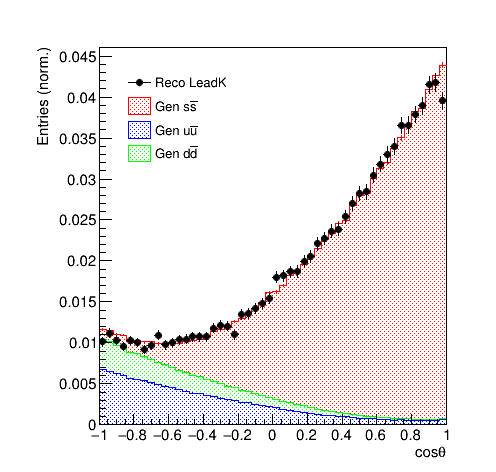

In [17]:
c2.Draw()

## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```